In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sklearn.preprocessing

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore",category= FutureWarning)

In [10]:
finaldf = pd.read_csv('finaldf.csv')
finaldf.columns

Index(['Unnamed: 0', 'Customer Code', 'Total Sales', 'buying_freq',
       'Products_Eng', 'Category_Eng', 'Destenation_Eng'],
      dtype='object')

In [11]:
#drop 'Unnamed: 0'and 'Customer Code' 
finaldf.drop(['Unnamed: 0', 'Customer Code'],axis= 1,inplace=True)

Standarize the data using scale()

In [12]:
df_scaled = sklearn.preprocessing.scale(finaldf)

In [13]:
df_scaled

array([[-0.40949027, -0.4767069 , -0.98060228, -1.32537787,  0.07738232],
       [-0.38294591, -0.22923912, -0.25188931,  1.03084946,  0.07738232],
       [-0.3177408 , -0.01270482, -0.5381694 ,  0.6381449 ,  0.07738232],
       [-0.41570402, -0.4767069 , -0.69432218, -1.32537787,  0.07738232],
       [ 4.63662384,  3.82304572,  3.8601339 ,  1.42355401,  0.07738232],
       [ 0.07826599,  0.20382949,  2.68898805,  1.42355401,  0.07738232],
       [-0.39350487, -0.41483996, -0.77239857, -1.32537787,  0.07738232],
       [-0.30634726, -0.29110607,  1.20553664,  1.03084946,  0.07738232],
       [-0.41873411, -0.41483996, -0.8244495 , -0.53996876,  0.07738232],
       [-0.41849414, -0.4767069 , -0.95457681, -1.32537787,  0.07738232],
       [-0.10626281, -0.16737218,  1.15348571,  1.03084946,  0.07738232],
       [-0.31861828, -0.44577343, -0.8244495 , -1.32537787,  0.07738232],
       [-0.4145031 , -0.44577343, -0.72034764, -0.14726421,  0.07738232],
       [-0.41073004, -0.35297301,  0.1

Create plot for elbow method to decide optimum number of clusters 

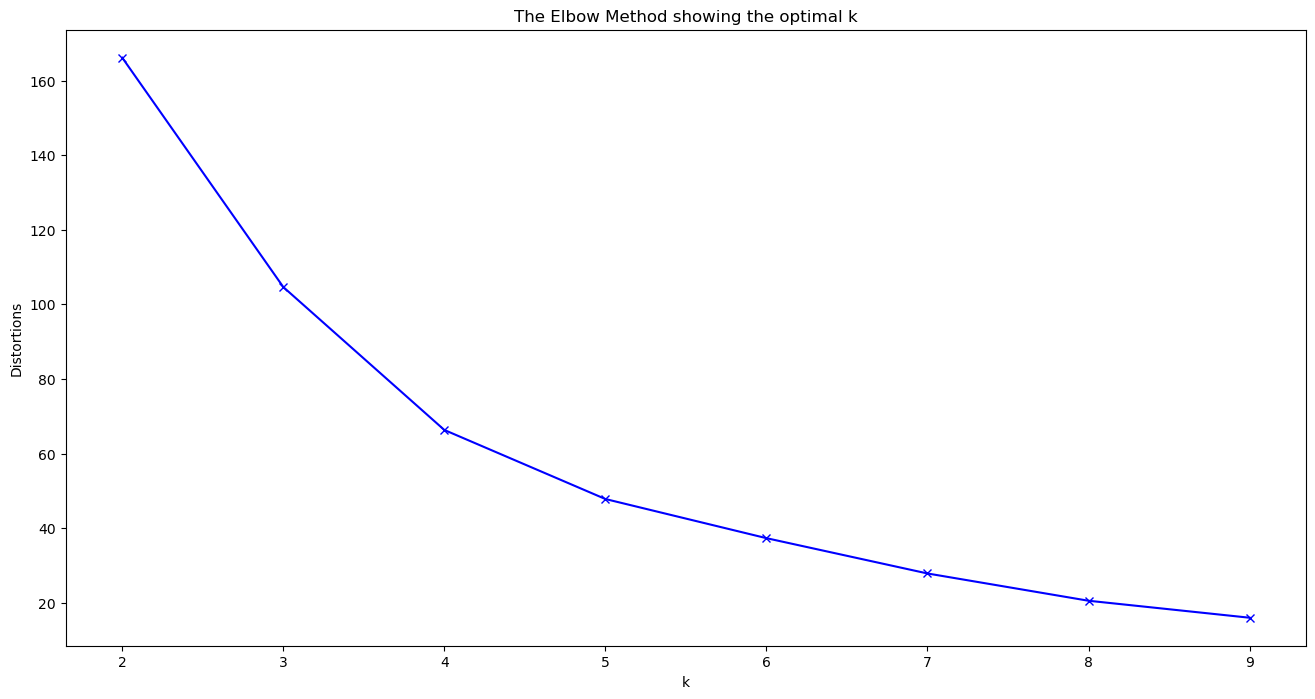

In [19]:
distortions = []
K= range (2,10)
for k in K :
    kmeanModel = KMeans(n_clusters= k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    
    

Using elbow method k=4 clusters are finalisd

Running KMeans model

In [22]:
CL = KMeans(n_clusters=4,random_state=3425)
CL.fit(df_scaled)
# compute centroids
centroids = CL.cluster_centers_
centroids

array([[-0.09590362, -0.04492719,  0.52453702,  0.76904642,  0.25794108],
       [ 3.29888474,  3.27397659,  1.82364139,  1.22720173,  0.07738232],
       [-0.39090679, -0.42792719, -0.7904162 , -0.93267332,  0.07738232],
       [-0.36513777, -0.44577343,  0.33368362,  0.44179262, -4.25602778]])

Add cluster membership to the data 

In [24]:
segment = pd.DataFrame(CL.labels_)
custsales = finaldf.assign(segment = segment)
custsales['segment'] = custsales['segment']+1
custsales.head()

,Total Sales,buying_freq,Products_Eng,Category_Eng,Destenation_Eng,segment
0,1.228412e+04,1,2,1,1,3
1,3.916354e+04,9,30,7,1,1
2,1.051917e+05,16,19,6,1,1
3,5.991940e+03,1,13,1,1,3
4,5.122093e+06,140,188,8,1,2


In [25]:
len(custsales)

56

Computing Cluster size 

In [26]:
custsales.groupby('segment')['segment'].count()

segment
1    24
2     4
3    26
4     2
Name: segment, dtype: int64

Visualising cluster solution using two principal component of variables used in the clustering algorithm

In [27]:
pca = PCA().fit(df_scaled)
val = PCA().fit_transform(df_scaled)
pca_df = pd.DataFrame(val)
pca_df = pca_df[[0,1]]
pca_df.columns = ['Dim1','Dim2']
finaldf = pd.concat([custsales,pca_df],axis= 1)
finaldf.head()

,Total Sales,buying_freq,Products_Eng,Category_Eng,Destenation_Eng,segment,Dim1,Dim2
0,1.228412e+04,1,2,1,1,3,-1.540263,-0.205889
1,3.916354e+04,9,30,7,1,1,0.008167,-0.027489
2,1.051917e+05,16,19,6,1,1,-0.160614,-0.089081
3,5.991940e+03,1,13,1,1,3,-1.399508,-0.176664
4,5.122093e+06,140,188,8,1,2,7.014854,0.051270


<AxesSubplot: xlabel='Dim1', ylabel='Dim2'>

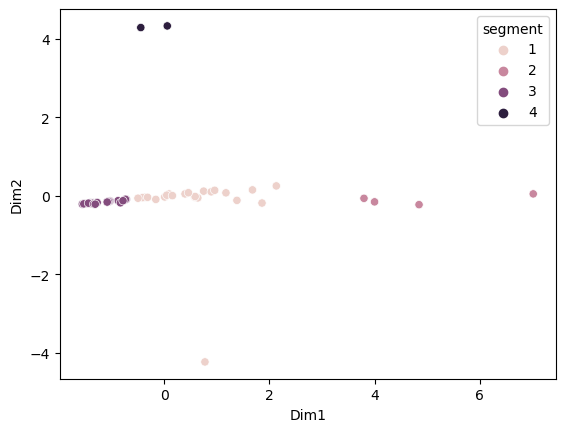

In [29]:
sns.scatterplot(x = finaldf['Dim1'], y= finaldf['Dim2'],hue=finaldf['segment'])

calculate mean for each variable clusterwise

In [34]:
seg_analysis = custsales.groupby('segment')['Total Sales', 'buying_freq', 'Products_Eng', 'Category_Eng',
       'Destenation_Eng'].mean().reset_index().round(2)
seg_analysis

,segment,Total Sales,buying_freq,Products_Eng,Category_Eng,Destenation_Eng
0,1,329829.01,14.96,59.83,6.33,1.04
1,2,3767467.99,122.25,109.75,7.50,1.00
2,3,31102.17,2.58,9.31,2.00,1.00
3,4,57196.46,2.00,52.50,5.50,0.00


In [30]:
custsales.columns

Index(['Total Sales', 'buying_freq', 'Products_Eng', 'Category_Eng',
       'Destenation_Eng', 'segment'],
      dtype='object')

In [35]:
col_list =['Total Sales', 'buying_freq', 'Products_Eng', 'Category_Eng',
       'Destenation_Eng']

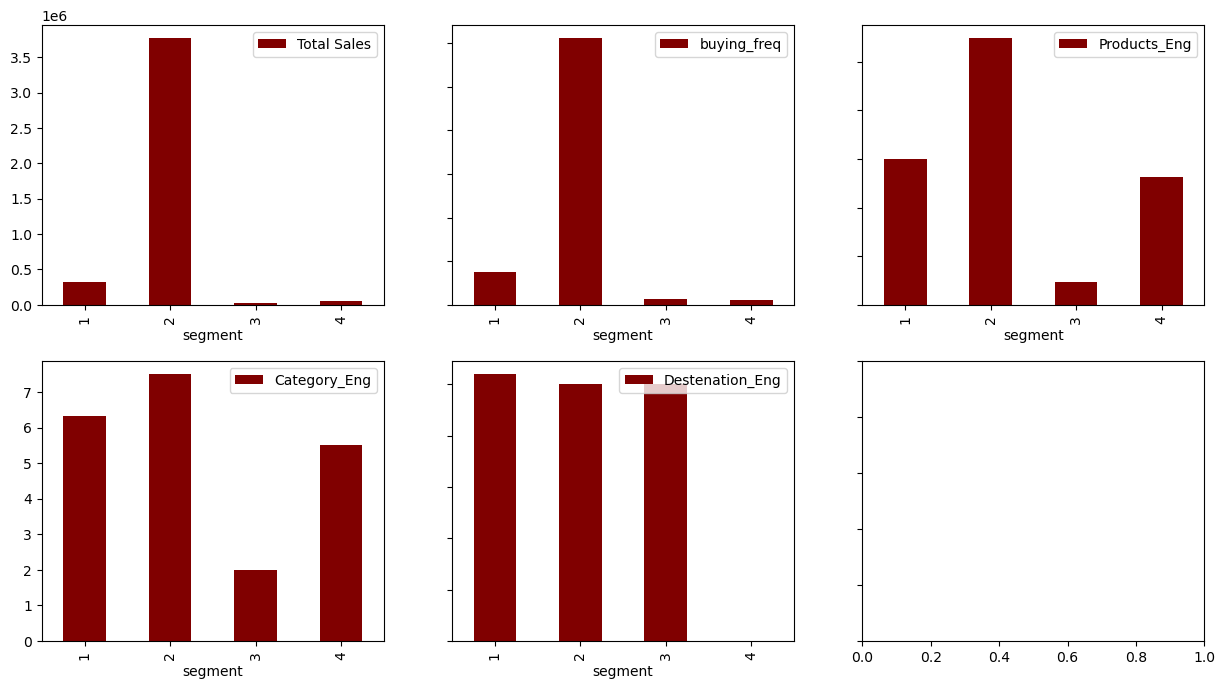

In [36]:
# create a figure
fig,axes = plt.subplots(nrows=2 ,ncols=3,figsize=(15,8))
axe = axes.ravel()
# plot each zone on a particular axis
for i, cols in enumerate(col_list):
    seg_analysis.plot.bar('segment',cols,color = 'maroon',ax = axe[i],sharey= True)

cluster 3 appears to be a cluster of "Platinum" customers whereas customers in cluster 3 is group of under performers.
Customers in cluster 1 are next to "Platinum" group